
# Part 1: Load modules

In this section, you'll import the necessary libraries and define several functions to preprocess the MIT input data Nothing observable happens here, but you can expand the hidden code cells to see the implementation for some of the functions we'll be calling later on.
This script is written in python3.8 adn tensorflow2.9.0

In [1]:
!python --version

Python 3.10.12


In [2]:

!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 24.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [3]:
import csv
import cv2
import numpy as np
import pandas as pd
import pickle
import os
import tensorflow as tf
import tensorflow_hub as hub

from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.python.eager.context import jit_compile_rewrite_enabled
from sklearn.model_selection import train_test_split
#from keras.utils.vis_utils import plot_model



In [4]:
print(tf.__version__)
!python --version

2.9.0
Python 3.10.12


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## New data uploaded 2022

In [33]:
import pickle

New_file_path = '/content/drive/MyDrive/PPIT/PPIT_database/2022_1019/20221019_1_set_1_1.p'

with open(New_file_path, 'rb') as file:
    N_data = pickle.load(file)

print(N_data)


{'pressure': array([[[ 0.        ,  0.        , -0.01190476, ..., -0.01724138,
          0.02941176, -0.03703704],
        [-0.02      , -0.02830189,  0.00990099, ...,  0.01123596,
         -0.01869159, -0.02531646],
        [ 0.05      ,  0.015625  ,  0.01123596, ..., -0.03191489,
          0.05208333, -0.0375    ],
        [ 0.0326087 , -0.07317073,  0.        , ...,  0.03296703,
          0.        ,  0.03703704],
        [ 0.        , -0.03947368,  0.03614458, ...,  0.        ,
         -0.01136364, -0.05405405],
        [-0.01234568,  0.        ,  0.01234568, ...,  0.01123596,
          0.06382979, -0.01351351]],

       [[ 0.        ,  0.        , -0.01190476, ..., -0.03448276,
          0.        , -0.01234568],
        [-0.02      , -0.02830189,  0.00990099, ...,  0.02247191,
         -0.02803738,  0.        ],
        [ 0.05      ,  0.015625  ,  0.        , ...,  0.0106383 ,
         -0.01041667,  0.0625    ],
        [ 0.0326087 , -0.07317073,  0.        , ...,  0.04395604,
 

In [36]:
import numpy as np

# Assuming `data` contains the loaded dictionary from your .p file
keypoint_array = N_data['keypoint']

# Define the value that represents null
null_value = -9999

# Check for null values in the 'keypoint' array
null_values_exist = np.any(keypoint_array == null_value)

if null_values_exist:
    print("Null values exist in the 'keypoint' array.")
else:
    print("No null values found in the 'keypoint' array.")


No null values found in the 'keypoint' array.


In [ ]:
import pickle

New_file_path = '/content/drive/MyDrive/PPIT/PPIT_database/20221019/20221019_1_set_1_1.p'

with open(New_file_path, 'rb') as file:
    N_data = pickle.load(file)

print(N_data)


{'pressure': array([[[ 0.        ,  0.        , -0.01190476, ..., -0.01724138,
          0.02941176, -0.03703704],
        [-0.02      , -0.02830189,  0.00990099, ...,  0.01123596,
         -0.01869159, -0.02531646],
        [ 0.05      ,  0.015625  ,  0.01123596, ..., -0.03191489,
          0.05208333, -0.0375    ],
        [ 0.0326087 , -0.07317073,  0.        , ...,  0.03296703,
          0.        ,  0.03703704],
        [ 0.        , -0.03947368,  0.03614458, ...,  0.        ,
         -0.01136364, -0.05405405],
        [-0.01234568,  0.        ,  0.01234568, ...,  0.01123596,
          0.06382979, -0.01351351]],

       [[ 0.        ,  0.        , -0.01190476, ..., -0.03448276,
          0.        , -0.01234568],
        [-0.02      , -0.02830189,  0.00990099, ...,  0.02247191,
         -0.02803738,  0.        ],
        [ 0.05      ,  0.015625  ,  0.        , ...,  0.0106383 ,
         -0.01041667,  0.0625    ],
        [ 0.0326087 , -0.07317073,  0.        , ...,  0.04395604,
 

#### Old Data 2023

In [ ]:
import pickle

file_path = '/content/drive/MyDrive/PPIT/PPIT_database/20230626/20230626_1_set_1_1.p'

with open(file_path, 'rb') as file:
    data2 = pickle.load(file)

print(data2)


{'pressure': array([[[-0.15  ,  0.1   ,  0.    , ...,  0.025 , -0.15  ,  0.075 ],
        [-0.1   , -0.05  , -0.025 , ..., -0.125 , -0.05  , -0.075 ],
        [-0.075 , -0.05  ,  0.1   , ..., -0.025 , -0.025 , -0.025 ],
        [-0.05  ,  0.075 ,  0.    , ...,  0.075 , -0.15  ,  0.    ],
        [-0.025 , -0.05  ,  0.    , ...,  0.    ,  0.1   , -0.05  ],
        [ 0.    ,  0.15  , -0.1   , ...,  0.1   , -0.025 ,  0.125 ]],

       [[-0.025 ,  0.    ,  0.    , ..., -0.225 , -0.225 ,  0.025 ],
        [ 0.    ,  0.075 ,  0.175 , ..., -0.05  ,  0.05  , -0.3   ],
        [-0.125 ,  0.    , -0.05  , ..., -0.075 , -0.1   ,  0.05  ],
        [-0.05  ,  0.05  , -0.1   , ...,  0.2   , -0.05  , -0.05  ],
        [ 0.125 , -0.075 , -0.025 , ...,  0.    , -0.05  ,  0.    ],
        [ 0.    ,  0.075 ,  0.05  , ..., -0.15  , -0.025 ,  0.15  ]],

       [[ 0.    ,  0.05  ,  0.    , ...,  0.075 , -0.275 ,  0.075 ],
        [-0.025 ,  0.075 ,  0.025 , ...,  0.1   ,  0.15  ,  0.025 ],
        [-0.125 ,

In [ ]:
data2['keypoint'][0]


array([[-4009. ,   396.5, 27514. ],
       [ 3399. ,   939. , 27555. ],
       [-4460.5,   965. , 21606. ],
       [ 3904. ,  1355. , 21725.5],
       [-4436. , -1446. , 17203. ],
       [ 4429. ,  -331.5, 17276. ],
       [-3750. ,   626. , 16848. ],
       [ 3464.5,   774. , 17188.5],
       [-2297. ,  1156. ,  8365. ],
       [ 1978. ,  1107. ,  8546. ],
       [-2583. ,  2292. ,   682. ],
       [ 2224.5,  2227. ,   764. ],
       [-3326. ,  -341. ,   185. ],
       [ 2995. ,  -452. ,   175. ]])

In [ ]:
import yaml

# Path to your YAML file
yaml_file_path = "/content/drive/MyDrive/PPIT/PPIT_database/20230626/20230626_log.yml"

# Load YAML file
with open(yaml_file_path, 'r') as file:
    yaml_data = yaml.safe_load(file)

# Print the parsed YAML data
#print(yaml_data)

# print the YAML data
print(yaml.dump(yaml_data, default_flow_style=False))


axis_range: 32767
date_folder_list: '20230626'
frequency: 10
joints:
  Left ankle: 12
  Left elbow: 4
  Left hip: 8
  Left knee: 10
  Left shoulder: 2
  Left toe: 14
  Left wrist: 6
  Right ankle: 11
  Right elbow: 3
  Right hip: 7
  Right knee: 9
  Right shoulder: 1
  Right toe: 13
  Right wrist: 5



In [6]:
data_log = {
    'export_dir': '/content/drive/MyDrive/PPIT/',
    'joints': {'Left ankle': 12,
                'Left elbow': 4,
                'Left hip': 8,
                'Left knee': 10,
                'Left shoulder': 2,
                'Left toe': 14,
                'Left wrist': 6,
                'Right ankle': 11,
                'Right elbow': 3,
                'Right hip': 7,
                'Right knee': 9,
                'Right shoulder': 1,
                'Right toe': 13,
                'Right wrist': 5,
              #  'Left heel':15,
              #  'Right heel':16

               }
}

In [7]:
frame_no = 7
after_frame = 3
batch_size = 32
shuffle_buffer_size = 1000
num_epochs = 10

In [8]:
data_dir = "/content/drive/MyDrive/PPIT/PPIT_database/2022_1019/"
#print(os.listdir(data_dir))

# Get a list of all files in the dataset directory
all_files = os.listdir(data_dir)
all_files

['20221019_1_set_1_1.p',
 '20221019_1_set_1_2.p',
 '20221019_1_set_1_3.p',
 '20221019_1_set_2_1.p',
 '20221019_1_set_2_2.p',
 '20221019_1_set_2_3.p',
 '20221019_1_set_3_2.p',
 '20221019_log.yml']

In [9]:
# Filter files to keep only those ending with ".p"
pickle_files = [file for file in all_files if file.endswith(".p")]

In [10]:
# Split the files into training and validation sets
split_ratio = 0.8
num_files = len(pickle_files)
num_train_files = int(split_ratio * num_files)

In [11]:
# Training and validation file paths
train_file_paths = [os.path.join(data_dir, file) for file in pickle_files[:num_train_files]]
val_file_paths = [os.path.join(data_dir, file) for file in pickle_files[num_train_files:]]

# Print the training file paths
for path in train_file_paths:
  print(path)

/content/drive/MyDrive/PPIT/PPIT_database/2022_1019/20221019_1_set_1_1.p
/content/drive/MyDrive/PPIT/PPIT_database/2022_1019/20221019_1_set_1_2.p
/content/drive/MyDrive/PPIT/PPIT_database/2022_1019/20221019_1_set_1_3.p
/content/drive/MyDrive/PPIT/PPIT_database/2022_1019/20221019_1_set_2_1.p
/content/drive/MyDrive/PPIT/PPIT_database/2022_1019/20221019_1_set_2_2.p


In [12]:
from tensorflow.python.eager.context import jit_compile_rewrite_enabled
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split

def load_pickle_file(file_path):
    # Load the data from the pickle file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def restack_electrode_data(pressure, location):
    frame_data = np.zeros((13,24))
    for i in range(frame_data.shape[0]):
      for j in range(frame_data.shape[1]):
        # i.   0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
        # loc  0,  , 1,  , 2,  , 3,  , 4,  ,  5,   ,  6
        # pres. , 0,  , 1,  , 2,  , 3,  , 4,   ,  5,


        # j.   0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ..., 22, 23
        # loc  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ..., 22, 23
        # pres.0, 0, 1, 1, 2, 2, 3, 3, 4, 4,  5,  5,  6,      11, 11
        source_i = i//2
        source_j = j
        source_data = location
        if i%2 != 0: # pressure
          source_data = pressure
          source_j = j // 2
        frame_data[i,j] = source_data[source_i, source_j]
    return frame_data

def data_generator(file_paths, batch_size, frame=frame_no, after_frame=after_frame):
    for file_path in file_paths:
        # Load the data from the pickle file
        data = load_pickle_file(file_path)

        # Extract the input data and target data
        reshaped_data = []
        for i in range(len(data["location"])):
          pressure = data["pressure"][i]
          location = data["location"][i]
          reshaped_data.append(restack_electrode_data(pressure, location))
        data["reshaped_electrode"] = np.array(reshaped_data)

        input_data = []
        for i in range(len(data["reshaped_electrode"]) - frame + 1 - after_frame):
          input_data.append(data["reshaped_electrode"][i:i+frame+after_frame])
        input_data = np.array(input_data)
        # target_data = data["heatmap"]
        # generate target data with only a few keypoints
        target_data = np.stack((#data["keypoint"][frame-1:-after_frame, data_log['joints']['Left heel']-1,:],
                                 #data["keypoint"][frame-1:-after_frame, data_log['joints']['Right heel']-1,:],
                                data["keypoint"][frame-1:-after_frame, data_log['joints']['Left toe']-1,:],
                                 data["keypoint"][frame-1:-after_frame, data_log['joints']['Right toe']-1,:],
                                data["keypoint"][frame-1:-after_frame, data_log['joints']['Left ankle']-1,:],
                                 data["keypoint"][frame-1:-after_frame, data_log['joints']['Right ankle']-1,:],
                                data["keypoint"][frame-1:-after_frame, data_log['joints']['Left knee']-1,:],
                                 data["keypoint"][frame-1:-after_frame, data_log['joints']['Right knee']-1,:],
                                data["keypoint"][frame-1:-after_frame, data_log['joints']['Left hip']-1,:],
                                 data["keypoint"][frame-1:-after_frame, data_log['joints']['Right hip']-1,:],
                                data["keypoint"][frame-1:-after_frame, data_log['joints']['Left shoulder']-1,:],
                                 data["keypoint"][frame-1:-after_frame, data_log['joints']['Right shoulder']-1,:],
                                data["keypoint"][frame-1:-after_frame, data_log['joints']['Left elbow']-1,:],
                                 data["keypoint"][frame-1:-after_frame, data_log['joints']['Right elbow']-1,:],
                                data["keypoint"][frame-1:-after_frame, data_log['joints']['Left wrist']-1,:],
                                 data["keypoint"][frame-1:-after_frame, data_log['joints']['Right wrist']-1,:],
                                ),
                                axis=1)

        # target_data = data["keypoint"][frame-1:-after_frame]
        target_data = target_data/32767


        # Yield the data in batches
        for i in range(0, (len(input_data) - frame - after_frame)//batch_size, batch_size):
          yield input_data[i*batch_size:(i+1)*batch_size], target_data[i*batch_size:(i+1)*batch_size]


# Create a TensorFlow dataset for the training set
train_dataset = tf.data.Dataset.from_generator(lambda: data_generator(train_file_paths, batch_size), output_types=(tf.float32, tf.float32))
train_dataset = train_dataset.shuffle(buffer_size=shuffle_buffer_size).repeat(num_epochs)

# Create a TensorFlow dataset for the validation set
val_dataset = tf.data.Dataset.from_generator(lambda: data_generator(val_file_paths, batch_size), output_types=(tf.float32, tf.float32))
val_dataset = val_dataset.shuffle(buffer_size=shuffle_buffer_size).repeat(num_epochs)

# Create a TensorFlow dataset for the prediction and visualisation
visual_dataset_val = tf.data.Dataset.from_generator(lambda: data_generator(val_file_paths, batch_size), output_types=(tf.float32, tf.float32))
visual_dataset_train = tf.data.Dataset.from_generator(lambda: data_generator(train_file_paths[1:], batch_size), output_types=(tf.float32, tf.float32))


In [ ]:
input_shape_val = next(iter(visual_dataset_val))[1].shape
input_shape_val

TensorShape([32, 14, 3])

In [13]:
input_shape_val = next(iter(visual_dataset_val))[1].shape
input_shape_val

TensorShape([32, 14, 3])

In [ ]:
input_shape_train = next(iter(train_dataset))[0].shape
input_shape_val = next(iter(val_dataset))[0].shape

print("Shape of input data in train_dataset:", input_shape_train)
print("Shape of input data in val_dataset:", input_shape_val)

Shape of input data in train_dataset: (32, 10, 13, 24)
Shape of input data in val_dataset: (32, 10, 13, 24)


In [14]:
input_shape_train = next(iter(train_dataset))[0].shape
input_shape_val = next(iter(val_dataset))[0].shape

print("Shape of input data in train_dataset:", input_shape_train)
print("Shape of input data in val_dataset:", input_shape_val)

Shape of input data in train_dataset: (32, 10, 13, 24)
Shape of input data in val_dataset: (32, 10, 13, 24)


# Part2: AUTOENCODER MODEL
### construct model architecture (generate keypoint)
#### full body coordinates (Model 2)
##### This model use Conv3D and data collected in 2023. It contains 14 joints (keypoints)

##### This model give validation loss in the range of 0.015.

In [15]:
def construct_model(keep_layer=1):
  dropout=0.3
  decoder_layer = [1024,512,256,128,64]
  InputLayer = tf.keras.layers.Input(batch_size=32, shape=(frame_no+after_frame, 13, 24))
  # layer_index = tf.keras.layers.Input(shape=(10, 10, 1, 9))
  print("check the tensor type in InputLayer", InputLayer.get_shape())

  ######################################################
  #
  #   ENCODER
  #
  #######################################################

  x = InputLayer
  print(x.shape)

  x = tf.expand_dims(x, axis=-1)
  print(x.shape)

  x = tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same',
                            # kernel_initializer=tf.keras.initializers.Ones(),
                            # bias_initializer=tf.keras.initializers.Ones()
                            )(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.activations.tanh(x)
  x = tf.keras.layers.Dropout(dropout)(x)
  print(x.shape)

  # 2nd layers from 32 to 64
  x = tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same')(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.activations.tanh(x)
  x = tf.keras.layers.Dropout(dropout)(x)
  print(x.shape)

  # 3rd layers from 64 to 128
  x = tf.keras.layers.Conv2D(128, (4,2), strides=(2,2))(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.activations.tanh(x)
  x = tf.keras.layers.Dropout(dropout)(x)
  print(x.shape)

  # 3rd layers from 64 to 128
  x = x[:,:,0,:,:]
  print(x.shape)
  x = tf.keras.layers.Conv2D(128, (4,1), strides=(3,1))(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.activations.tanh(x)
  x = tf.keras.layers.Dropout(dropout)(x)
  print(x.shape)

  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(5376)(x)
  x = tf.keras.activations.tanh(x)
  x = tf.keras.layers.Dropout(dropout)(x)
  print(x.shape)
  x = tf.keras.layers.Reshape((14,3,128))(x)
  print(x.shape)


  # # ######################################################
  # #
  # # ##   DECODER
  # # #
  # # #######################################################

  x = tf.keras.layers.Conv2D(32, (2,2), strides=1, padding='same')(x)
  x = tf.keras.activations.tanh(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.layers.Dropout(dropout)(x)
  print(x.shape)


  # 6th layer from 64 to 2, 2 is the number of joints in keypoints

  x = tf.keras.layers.Conv2D(1, (2,2), strides=1, padding='same')(x)
  x = tf.keras.activations.tanh(x)
  print(x.shape)
  OutputLayer = x

  return InputLayer, OutputLayer

construct_model()


check the tensor type in InputLayer (32, 10, 13, 24)
(32, 10, 13, 24)
(32, 10, 13, 24, 1)
(32, 10, 7, 12, 32)
(32, 10, 4, 6, 64)
(32, 10, 1, 3, 128)
(32, 10, 3, 128)
(32, 3, 3, 128)
(32, 5376)
(32, 14, 3, 128)
(32, 14, 3, 32)
(32, 14, 3, 1)


(<KerasTensor: shape=(32, 10, 13, 24) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(32, 14, 3, 1) dtype=float32 (created by layer 'tf.math.tanh_6')>)

In [16]:
##### To start a new model
InputLayer, OutputLayer = construct_model()
model = keras.Model(InputLayer, OutputLayer)
model.summary()

check the tensor type in InputLayer (32, 10, 13, 24)
(32, 10, 13, 24)
(32, 10, 13, 24, 1)
(32, 10, 7, 12, 32)
(32, 10, 4, 6, 64)
(32, 10, 1, 3, 128)
(32, 10, 3, 128)
(32, 3, 3, 128)
(32, 5376)
(32, 14, 3, 128)
(32, 14, 3, 32)
(32, 14, 3, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(32, 10, 13, 24)]        0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (32, 10, 13, 24, 1)      0         
 a)                                                              
                                                                 
 conv2d_6 (Conv2D)           (32, 10, 7, 12, 32)       320       
                                                                 
 batch_normalization_5 (Batc  (32, 10, 7, 12, 32)      128       
 hNormalization)                                                 
                  

## Define loss

In [17]:
class heatmap_to_keypoint():
    """
    It creates  a keypoint (frame, joints, xyz) from a heatmap (frame, joints, 3Dheatmap_resolution)
    Output keypoint should be in the range of (-32767,32767) as the input in keypoint_to_heatmap
    The 3Dheatmap_resolution is (20, 20, 18) in the MIT model.
    """

    def __init__(self, axis_range=32767):
        self.axis_range = axis_range

    def __call__(self, heatmap, heatmap_shape=[20,20,18]):
        """
        heatmap is numpy array, it has a shape of (batch_size, joints, 3Dheatmap_resolution_in_xyz_axis)
        return data of size (frame, joints, xyz), data range is [0,1] before reverse_normalise,
        [-32767,32767) after reverse_normalise
        """
        y, x, z = [tf.linspace(0., 1., int(heatmap_shape[i]))
              for i in range(3)]
        self.pos_xyz = tf.meshgrid(x,y,z) # shape is [3, 20, 20, 18] here
        # heatmap = tf.reshape(heatmap, (*heatmap.shape[:-3], *heatmap_shape)) might not need it

        # heatmap shape is (batch_size, joints, 3Dheatmap_resolution_in_xyz_axis)

        eps = 1e-12
        expected_xyz = [
            tf.reduce_sum(tf.multiply([[self.pos_xyz[i]]], heatmap), axis=[-3,-2,-1])
            / (tf.reduce_sum(heatmap, axis=[-3,-2,-1]) + eps)
            for i in range(3)
        ] #The output shape is (3, batch_size, 16) where 16 is the joint number

        expected_xyz = tf.transpose(expected_xyz, perm=[1, 2, 0])

        expected_xyz = tf.convert_to_tensor(expected_xyz) # shape of (batch_size, 16, 3)
        xyz_float = self.reverse_normalise(expected_xyz) # shape of (batch_size, 16, 3)
        return xyz_float

    def reverse_normalise(self, data):
        """
        data has the shape of (batch_size, joints, xyz)
        """
        return data * self.axis_range * 2 - self.axis_range

In [18]:

heatmap2keypoint = heatmap_to_keypoint()
# keypoint2heatmap = keypoint_to_heatmap()
# link = tf.convert_to_tensor(data_log['link_limit'][0])
# limit = tf.convert_to_tensor(data_log['link_limit'][1])


def heatmap_loss(heatmap_GT, heatmap_pred, epsilon=1e-12):

    # heatmap_out = tf.where(heatmap_pred < epsilon, 0.0, heatmap_pred)
    loss = tf.reduce_mean(tf.square(heatmap_pred - heatmap_GT) * (heatmap_GT + 0.5) * 2) * 1000
    # loss = tf.reduce_mean(heatmap_pred, axis=(0,1,2))
    # loss = tf.reduce_mean(heatmap_pred)
    return loss*100

def keypoint_loss(keypoint_GT, keypoint_pred):
    keypoint_pred = tf.squeeze(keypoint_pred)
    keypoint_pred = tf.squeeze(keypoint_pred)
    loss = tf.reduce_mean(tf.square(keypoint_pred - keypoint_GT))
    return loss

reindex = {
    14: 0,
    13: 1,
    16: 2,
    15: 3,
    12: 4,
    11: 5
}

def link_loss(keypoint_pred):
    # link limit has the shape of (number of links, 2, 2), Axis 1 is linked joints. Axis 2 is the lower and upper limit of the link
    # The keypoint data has a shape of (time_frame, joint, xyz), time_frame could be 1
    #keypoint_pred has a shape of (batch_size, 16, 3)
    loss = []

    keypoint_pred = tf.squeeze(keypoint_pred)
    keypoint_pred = tf.squeeze(keypoint_pred)


    for link_limit in data_log['link_limit']:
        link, limit = link_limit
        try: # This to to avoid excess links
          distance = tf.norm(keypoint_pred[:, reindex[link[1]], :] - keypoint_pred[:, reindex[link[0]], :],
                              ord='euclidean', axis=0)
        except:
          continue
        # Calcuate how much is the predicted link away from the range. 3000 here is to calibrate
        #the maximum loss to be less than 10. This is to keep consistence with the MIT model

        distance = distance * 32767
        dist_diff = tf.where((distance > limit[0]) & (distance < limit[1]), 0.0, distance)
        loss_per_link = tf.reduce_mean(dist_diff)
        loss.append(loss_per_link)
    return tf.reduce_mean(loss)

def custom_loss(keypoint_GT, keypoint_pred):

    # keypoint_pred = tf.map_fn(lambda x:
    #                           tf.py_function(heatmap2keypoint, [x], tf.float32),
    #                           heatmap_pred)

    # keypoint_pred = heatmap2keypoint(heatmap_pred, heatmap_shape=heatmap_shape) # shape of (batch_size, joint, 3)
    loss1 = keypoint_loss(keypoint_GT, keypoint_pred)
    # print('loss1', heatmap_pred)
    # loss2 = link_loss(keypoint_pred)/3000/2
    # print('loss2', loss2.value)

    return loss1

## compile model

In [19]:

from keras.callbacks import LambdaCallback
import datetime

def callbacks():
  # Define the CSVLogger callback to save logs to a CSV file

  log_dir = os.path.join(data_log['export_dir'], 'model', 'submodel', 'training_logs.csv')
  csv_logger = keras.callbacks.CSVLogger(log_dir)

  # Create a TensorBoard callback and specify the log directory
  log_dir1 = os.path.join(data_log['export_dir'], 'model', 'submodel', 'logs', 'fit')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir1, histogram_freq=1)

  # Define a custom callback to print the value of a tensor
  # class PrintTensorCallback(tf.keras.callbacks.Callback):
  #     def on_train_batch_end(self, batch, logs=None):
  #         # print('Value of loss:',  self.model.layers[24].output)
  #         return

  ################## Add weight callback
  checkpoint_dir = os.path.join(data_log['export_dir'],'model', 'submodel', 'checkpoint{epoch:02d}-{val_loss:.2f}')

  log_dir = log_dir1+ '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

  # Define a custom callback to stop the epoch early
  early_stopping = tf.keras.callbacks.EarlyStopping(
                                                  monitor='val_loss',
                                                  min_delta=0,
                                                  patience=3,
                                                  verbose=0,
                                                  mode='auto',
                                                  baseline=None,
                                                  restore_best_weights=False,
                                                  # start_from_epoch=0
                                              )


  # Train the model with the callback
  # heatmap_GT_tensor = tf.convert_to_tensor(heatmap_GT)
  # , callbacks=[csv_logger]
  return early_stopping, csv_logger,tensorboard_callback

## Fit and save

In [20]:
# print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))
# Compile your model with your custom loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,
                                                 decay=0.003,
                                                #  clipvalue=1,
                                                 ),
              loss=custom_loss)

In [ ]:
# model_path = os.path.join(data_log['export_dir'], 'model_20230616_P2', 'checkpoint02-6.52')
# model = tf.keras.models.load_model(model_path, custom_objects={"keypoint_loss": keypoint_loss,
#                                                                "optimizer": tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.003),
#                                                                "custom_loss": custom_loss})


### 2022

In [22]:
#######
Hist1 = model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset,
          callbacks=[*callbacks()],
          batch_size=batch_size, verbose=1)


Epoch 1/10
50/50 [==============================] - 19s 355ms/step - loss: 0.3018 - val_loss: nan
Epoch 2/10
50/50 [==============================] - 18s 324ms/step - loss: 0.2792 - val_loss: nan
Epoch 3/10
50/50 [==============================] - 18s 323ms/step - loss: 0.2619 - val_loss: nan


## 2023

In [ ]:
#######
Hist = model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset,
          callbacks=[*callbacks()],
          batch_size=batch_size, verbose=1)


Epoch 1/25
925/925 [==============================] - 376s 384ms/step - loss: 0.2370 - val_loss: 0.0376
Epoch 2/25
925/925 [==============================] - 375s 386ms/step - loss: 0.1355 - val_loss: 0.0240
Epoch 3/25
925/925 [==============================] - 394s 406ms/step - loss: 0.1049 - val_loss: 0.0199
Epoch 4/25
925/925 [==============================] - 377s 387ms/step - loss: 0.0870 - val_loss: 0.0183
Epoch 5/25
925/925 [==============================] - 406s 418ms/step - loss: 0.0743 - val_loss: 0.0178
Epoch 6/25
925/925 [==============================] - 381s 391ms/step - loss: 0.0649 - val_loss: 0.0184
Epoch 7/25
925/925 [==============================] - 386s 398ms/step - loss: 0.0571 - val_loss: 0.0197
Epoch 8/25
925/925 [==============================] - 389s 401ms/step - loss: 0.0511 - val_loss: 0.0214


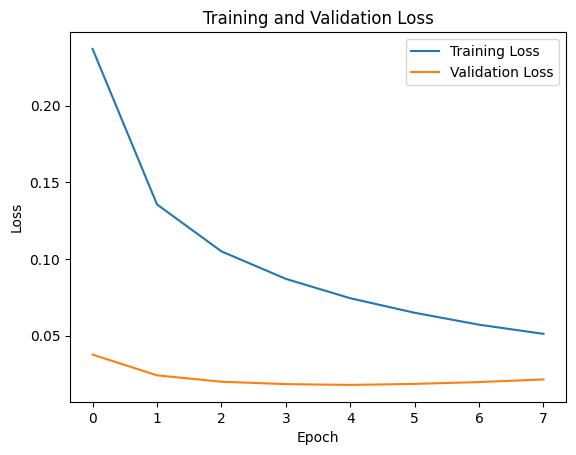

In [ ]:

# Access the training history
training_loss = Hist.history['loss']
validation_loss = Hist.history['val_loss']

# Plot training loss
plt.plot(training_loss, label='Training Loss')
# Plot validation loss
plt.plot(validation_loss, label='Validation Loss')

# Customize the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Save Model .h5

In [ ]:
model_path1 = os.path.join(data_log['export_dir'], 'PPIT_model_epoch09.h5')
model.save(model_path1)


In [ ]:
model_path2 = os.path.join(data_log['export_dir'], 'PPIT_model_epoch_opti_09.h5')
model.save(model_path2, save_format='h5', include_optimizer=False)


## Save Model .p

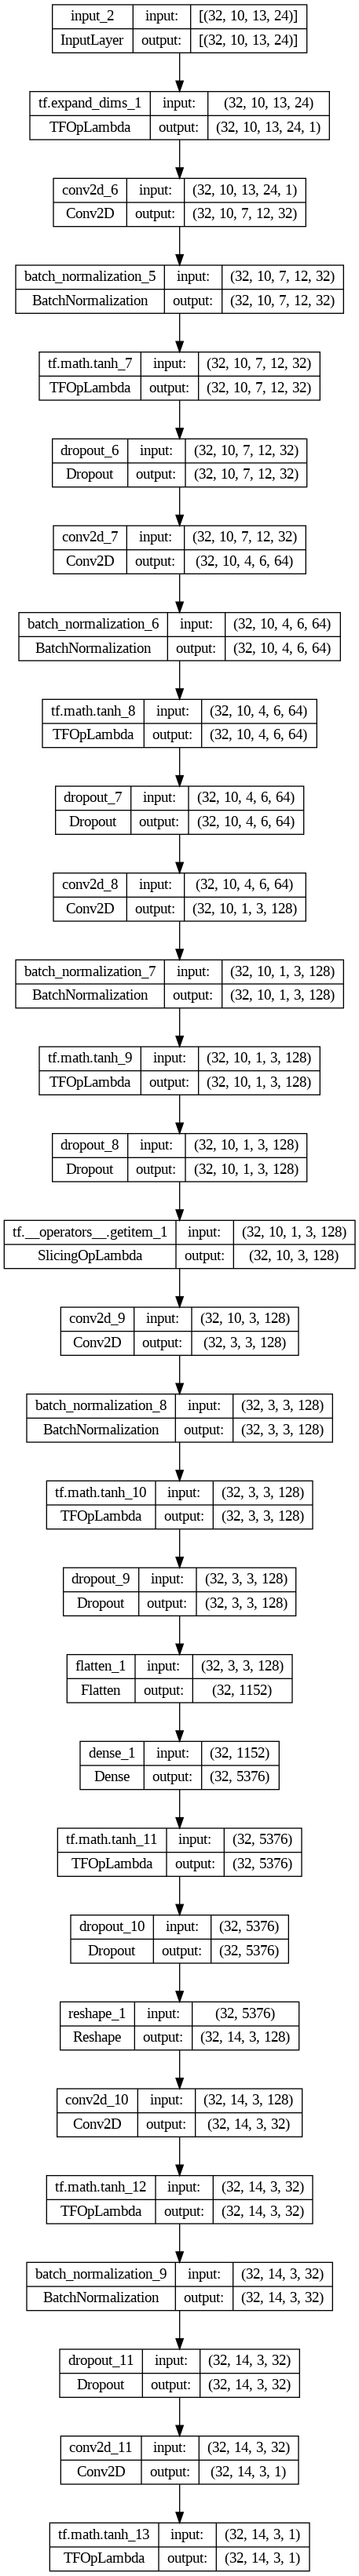

In [ ]:

# debug
# tf.debugging.experimental.enable_dump_debug_info(os.path.join(data_log['export_dir'], 'model', 'submodel', 'tmp','tfdbg'))
#######

# model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset,
#           callbacks=[*callbacks()],
#           batch_size=batch_size, verbose=1)

# Disable the debugger
tf.debugging.experimental.disable_dump_debug_info()

model_path = os.path.join(data_log['export_dir'], 'model', 'submodel', 'tensorflow')
try:
  os.mkdir(model_path)
except:
  None
model.save(model_path)

plot_model(model, to_file=model_path+'.png', show_shapes=True)

In [ ]:
# Save the model as a pickle file
predicted_model_path = os.path.join(data_log['export_dir'], 'model', 'submodel', 'predicted_model_5.p')
with open(predicted_model_path, 'wb') as file:
    pickle.dump(model, file)

## Load Model

In [ ]:
load_model = tf.keras.models.load_model('/content/drive/MyDrive/PPIT/PPIT_trained_model_25epoch.h5')


ValueError: Unknown loss function: 'custom_loss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
load_model = tf.keras.models.load_model('/content/drive/MyDrive/PPIT/PPIT_model_epoch_opti_09.h5')

In [ ]:
pred = model.predict(train_dataset)

925/925 [==============================] - 191s 182ms/step


In [23]:
pred_2022 = model.predict(val_dataset)

20/20 [==============================] - 9s 133ms/step


In [24]:
pred_2022

array([[[[0.6336675 ],
         [0.59982455],
         [0.22258475]],

        [[0.4368724 ],
         [0.57903343],
         [0.077838  ]],

        [[0.42494753],
         [0.4779027 ],
         [0.1337682 ]],

        ...,

        [[0.22415666],
         [0.15690863],
         [0.61586905]],

        [[0.32413933],
         [0.3568387 ],
         [0.40480363]],

        [[0.08925514],
         [0.16376725],
         [0.24939206]]],


       [[[0.59131455],
         [0.62472504],
         [0.21101312]],

        [[0.41980276],
         [0.5445871 ],
         [0.07687453]],

        [[0.38695925],
         [0.45701832],
         [0.11661922]],

        ...,

        [[0.3035111 ],
         [0.22541691],
         [0.6485486 ]],

        [[0.37769467],
         [0.4045652 ],
         [0.4281165 ]],

        [[0.09738469],
         [0.13933131],
         [0.22493228]]],


       [[[0.564063  ],
         [0.5868373 ],
         [0.26260844]],

        [[0.44113997],
         [0.59300154],

In [ ]:
pred

array([[[[ 2.85754830e-01],
         [ 5.09753972e-02],
         [-1.55908950e-02]],

        [[-1.27566934e-01],
         [ 5.05426945e-03],
         [ 5.08230831e-03]],

        [[ 1.04000933e-01],
         [ 7.72681460e-02],
         [ 6.83142687e-04]],

        ...,

        [[-1.82126701e-01],
         [ 3.73007245e-02],
         [ 6.88231826e-01]],

        [[ 9.61496010e-02],
         [ 4.06468567e-03],
         [ 6.13019705e-01]],

        [[-1.33528903e-01],
         [-1.16123781e-02],
         [ 5.49512267e-01]]],


       [[[ 2.83692539e-01],
         [ 5.13224490e-02],
         [-1.74371358e-02]],

        [[-1.25873178e-01],
         [ 5.77150099e-03],
         [ 4.78996988e-03]],

        [[ 1.10741965e-01],
         [ 7.11351559e-02],
         [ 2.30046944e-03]],

        ...,

        [[-1.86651960e-01],
         [ 3.89872156e-02],
         [ 6.87020063e-01]],

        [[ 9.67343226e-02],
         [ 1.40695833e-04],
         [ 6.10947967e-01]],

        [[-1.36540562e-0

In [ ]:
predictions = model.predict(val_dataset)

300/300 [==============================] - 55s 167ms/step


In [ ]:
predictions_visual = model.predict(visual_dataset_val)

12/12 [==============================] - 3s 233ms/step


In [ ]:
def save_predictions(predictions, save_path):
    # Save predictions to a pickle file
    with open(save_path, 'wb') as f:
        pickle.dump(predictions, f)

## Save Predictions

In [ ]:
# Save the predictions to a file
save_path = os.path.join(data_log['export_dir'],'prediction_result_val_data_09.p')
save_predictions(predictions,save_path )


# Visualise predicted keypoint from model

In [25]:
body = [ [13, 11 , 9, 10, 12, 14], # arm joints

         [ 1, 3, 5, 7, 8, 6, 4,2], #leg joints

         [9, 7, 8 ,10], #torso joints

        ]


In [ ]:
# # Create the data for the 3D skeleton, integer refers to the index of joint
# body = [ [5, 3, 1, 2, 4, 6], # arm joints
#          [ 13, 11, 9, 7, 8, 10, 12, 14], #leg joints
#          [7, 1, 2, 8], #torso joints
#         ]


## Loading predicted .p file

In [ ]:
prediction_path = '/content/drive/MyDrive/PPIT/prediction_result_val_data_15.p'

with open(prediction_path, 'rb') as f:
  predicted_data = pickle.load(f)  # shape (frame, joint, xyz)


In [ ]:
predictions

array([[[[ 2.69539863e-01],
         [ 8.25136621e-03],
         [ 5.01907580e-02]],

        [[-1.91416681e-01],
         [ 2.58187260e-02],
         [ 7.71127418e-02]],

        [[ 2.15930954e-01],
         [ 1.26735158e-02],
         [ 7.07364455e-02]],

        ...,

        [[-9.69870389e-02],
         [ 6.65222779e-02],
         [ 6.11662924e-01]],

        [[-1.46418754e-02],
         [-1.07126981e-01],
         [ 5.11913002e-01]],

        [[-2.24500537e-01],
         [ 2.83433590e-02],
         [ 4.89784092e-01]]],


       [[[ 2.72916347e-01],
         [-5.92426222e-04],
         [ 4.85912822e-02]],

        [[-1.90186620e-01],
         [ 3.02872546e-02],
         [ 7.72444233e-02]],

        [[ 2.27927804e-01],
         [ 1.21372137e-02],
         [ 7.26252273e-02]],

        ...,

        [[-9.35144499e-02],
         [ 6.49899617e-02],
         [ 6.03146553e-01]],

        [[-7.93339033e-03],
         [-1.12801701e-01],
         [ 5.09037256e-01]],

        [[-2.23713920e-0

In [ ]:
predictions_visual

array([[[[ 2.56537378e-01],
         [ 6.07223576e-03],
         [-2.29063760e-02]],

        [[-1.67147204e-01],
         [ 4.95874602e-03],
         [-1.47426054e-02]],

        [[ 3.89180221e-02],
         [ 9.78633612e-02],
         [ 8.69220705e-04]],

        ...,

        [[-2.54094958e-01],
         [ 5.55773117e-02],
         [ 6.92976236e-01]],

        [[ 1.11994237e-01],
         [ 7.24101141e-02],
         [ 6.09118819e-01]],

        [[-1.09594695e-01],
         [-9.94184613e-03],
         [ 5.67050159e-01]]],


       [[[ 2.58330971e-01],
         [ 8.75783991e-03],
         [-2.29495522e-02]],

        [[-1.66931391e-01],
         [ 5.16414177e-03],
         [-1.52228149e-02]],

        [[ 3.88614647e-02],
         [ 9.32043344e-02],
         [-1.54576020e-03]],

        ...,

        [[-2.50809371e-01],
         [ 6.13645315e-02],
         [ 6.91141367e-01]],

        [[ 1.14993058e-01],
         [ 6.94857463e-02],
         [ 6.07325733e-01]],

        [[-1.08935229e-0

In [ ]:
predictions.shape

(9600, 14, 3, 1)

In [26]:
pred_2022.shape

(640, 14, 3, 1)

In [ ]:
predictions_visual.shape

(384, 14, 3, 1)

#### True Coords

In [ ]:
data_type = "val"
# heatmap_data = data['heatmap'][100:102]
joint_data = np.squeeze(predictions)
joint_data.shape

(9600, 14, 3)

In [ ]:
data_type = "val"
# heatmap_data = data['heatmap'][100:102]
joint_data = np.squeeze(pred)
joint_data.shape

(29600, 14, 3)

In [31]:
data_type = "val"

In [ ]:

# heatmap_data = data['heatmap'][100:102]
joint_data = np.squeeze(predictions_visual)
joint_data.shape

joint_data *= 32767

In [ ]:

# heatmap_data = data['heatmap'][100:102]
joint_data = np.squeeze(pred)
joint_data.shape

joint_data *= 32767

In [ ]:
################################################################################
# change this to your own data path
################################################################################
arm_data = np.swapaxes([joint_data[:, i-1, :] for i in body[0]], 0, 1).astype(int)
arm_data = np.swapaxes(arm_data, 1, 2).astype(int)
leg_data = np.swapaxes([joint_data[:, i-1, :] for i in body[1]], 0, 1).astype(int)
leg_data = np.swapaxes(leg_data, 1, 2).astype(int)
torso_data = np.swapaxes([joint_data[:, i-1, :] for i in body[2]], 0, 1).astype(int)
torso_data = np.swapaxes(torso_data, 1, 2).astype(int)

In [ ]:
arm_data.shape

(384, 3, 6)

## Predicted coords

In [27]:
# Squeeze the predicted_data array
predicted_data_2022 = np.squeeze(pred_2022)

# Print the shape after squeezing
print(predicted_data_2022.shape)


(640, 14, 3)


In [ ]:
# Squeeze the predicted_data array
predicted_data = np.squeeze(predictions)

# Print the shape after squeezing
print(predicted_data.shape)


(9600, 14, 3)


In [ ]:
# Squeeze the predicted_data array
predicted_data = np.squeeze(pred)

# Print the shape after squeezing
print(predicted_data.shape)


(29600, 14, 3)


In [ ]:
# Squeeze the predicted_data array
predicted_data = np.squeeze(predictions_visual)

# Print the shape after squeezing
print(predicted_data.shape)


(384, 14, 3)


In [28]:
predicted_joint_data = predicted_data_2022[0000:1000] * 32767
print(predicted_joint_data.shape)
print(np.max(predicted_joint_data))

(640, 14, 3)
30103.516


In [ ]:
predicted_joint_data = predicted_data[0000:1000] * 32767
print(predicted_joint_data.shape)
print(np.max(predicted_joint_data))

(1000, 14, 3)
27550.44


In [ ]:
predicted_joint_data = predicted_data[0000:1000] * 32767
print(predicted_joint_data.shape)
print(np.max(predicted_joint_data))

(384, 14, 3)
27550.44


In [ ]:
predicted_joint_data = predicted_data[0000:1000] * 32767
print(predicted_joint_data.shape)
print(np.max(predicted_joint_data))

(1000, 14, 3)
896122560.0


In [29]:
################################################################################
# change this to your own prediction data
################################################################################
predicted_arm_data = np.swapaxes([predicted_joint_data[:, i-1, :] for i in body[0]], 0, 1).astype(int)
predicted_arm_data = np.swapaxes(predicted_arm_data, 1, 2).astype(int)
predicted_leg_data = np.swapaxes([predicted_joint_data[:, i-1, :] for i in body[1]], 0, 1).astype(int)
predicted_leg_data = np.swapaxes(predicted_leg_data, 1, 2).astype(int)
predicted_torso_data = np.swapaxes([predicted_joint_data[:, i-1, :] for i in body[2]], 0, 1).astype(int)
predicted_torso_data = np.swapaxes(predicted_torso_data, 1, 2).astype(int)

In [ ]:
predicted_arm_data.shape

(1000, 3, 6)

In [ ]:
predicted_arm_data.shape

(384, 3, 6)

In [ ]:

# Define frames
import plotly.graph_objects as go

fig = go.Figure(frames=[go.Frame(
                                    data=[
                                            # go.Surface( x=mat_x,
                                            #             y=mat_y,
                                            #             z=pressure_map_data[k],
                                            #             name='Surface',
                                            #             visible=True
                                            #             ),

#                                             go.Scatter3d(
#                                                         x=arm_data[k,0,:],
#                                                         y=arm_data[k,1,:],
#                                                         z=arm_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
#                                             go.Scatter3d( # joint marker
#                                                          x=leg_data[k,0,:],
#                                                          y=leg_data[k,1,:],
#                                                          z=leg_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
#                                             go.Scatter3d( # joint marker
#                                                          x=torso_data[k,0,:],
#                                                          y=torso_data[k,1,:],
#                                                          z=torso_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
                                            go.Scatter3d(
                                                        x=predicted_arm_data[k,0,:],
                                                        y=predicted_arm_data[k,1,:],
                                                        z=predicted_arm_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='red',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='red',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
                                            go.Scatter3d( # joint marker
                                                         x=predicted_leg_data[k,0,:],
                                                         y=predicted_leg_data[k,1,:],
                                                         z=predicted_leg_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='blue',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='blue',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
                                            go.Scatter3d( # joint marker
                                                         x=predicted_torso_data[k,0,:],
                                                         y=predicted_torso_data[k,1,:],
                                                         z=predicted_torso_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='green',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='green',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
#                                             go.Scatter3d(
#                                                          x=predicted_joint_data[k,0,:],
#                                                          y=predicted_joint_data[k,1,:],
#                                                          z=predicted_joint_data[k,2,:],
#                                                             marker=dict(
#                                                                         size=10,
#                                                                         color='black'
#                                                                     ),

#                                                             mode='markers'
#                                                         ),


                                        ]
    ,
                                    name=str(k) # you need to name the frame for the animation to behave properly
                                )
                        for k in range(len(predicted_joint_data))])

# Add data to be displayed before animation starts
# fig.add_trace(go.Surface(
#                             x=mat_x,
#                             y=mat_y,
#                             z=pressure_map_data[0],
#                             cmin=0,
#                             cmax=100
#              ))


# fig.add_trace(go.Scatter3d(
#                             x=arm_data[0, 0, :],
#                             y=arm_data[0, 1, :],
#                             z=arm_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
# #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
# #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )


# fig.add_trace(go.Scatter3d( # joint marker
#                              x=leg_data[0, 0, :],
#                              y=leg_data[0, 1, :],
#                              z=leg_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
#     #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
#     #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )
# fig.add_trace(go.Scatter3d( # joint marker
#                              x=torso_data[0, 0, :],
#                              y=torso_data[0, 1, :],
#                              z=torso_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
# #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
# #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )


fig.add_trace(go.Scatter3d(
                            x=predicted_arm_data[0, 0, :],
                            y=predicted_arm_data[0, 1, :],
                            z=predicted_arm_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='red',
#                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='red',
#                                                                     colorscale='Inferno'
                                     )
                            ),
             )


fig.add_trace(go.Scatter3d( # joint marker
                             x=predicted_leg_data[0, 0, :],
                             y=predicted_leg_data[0, 1, :],
                             z=predicted_leg_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='blue',
    #                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='blue',
    #                                                                     colorscale='Inferno'
                                     )
                            ),
             )
fig.add_trace(go.Scatter3d( # joint marker
                             x=predicted_torso_data[0, 0, :],
                             y=predicted_torso_data[0, 1, :],
                             z=predicted_torso_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='green',
#                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='green',
#                                                                     colorscale='Inferno'
                                     )
                            ),
             )

def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]

# Layout
fig.update_layout(
         title='body movement',
         width=600,
         height=500,
#         paper_bgcolor='black',
#         plot_bgcolor='rgba(0,0,0,0)',
         scene=dict(
                    zaxis=dict(
                            range=[-40, 32747],
                              autorange=False,
# #                                color='white',
#                               ticksuffix = "%"
                                ),
                    aspectratio=dict(x=2, y=2, z=1),
                    xaxis=dict(
                            range=[-32747, 32747],
                              autorange=False,
#                         showgrid=False,
#                               showticklabels=False,
                    ),

#
                    yaxis=dict(
                            range=[-32747, 32747],
                              autorange=False,
#                             showgrid=False,
#                               showticklabels=False,
                    ),
                    xaxis_title = 'x',
                    yaxis_title = 'y',
                    zaxis_title = 'z',
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders,
        showlegend=False,
)

fig.show()

config_file_path = "/content/drive/MyDrive/PPIT/"
fig.write_html(os.path.join(os.path.dirname(config_file_path),
                            'Qualitative_Results',
                            "%s_body_movement_visualisation_1.html"%data_type)
            )


In [ ]:

# Define frames
import plotly.graph_objects as go

fig = go.Figure(frames=[go.Frame(
                                    data=[
                                            # go.Surface( x=mat_x,
                                            #             y=mat_y,
                                            #             z=pressure_map_data[k],
                                            #             name='Surface',
                                            #             visible=True
                                            #             ),

#                                             go.Scatter3d(
#                                                         x=arm_data[k,0,:],
#                                                         y=arm_data[k,1,:],
#                                                         z=arm_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
#                                             go.Scatter3d( # joint marker
#                                                          x=leg_data[k,0,:],
#                                                          y=leg_data[k,1,:],
#                                                          z=leg_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
#                                             go.Scatter3d( # joint marker
#                                                          x=torso_data[k,0,:],
#                                                          y=torso_data[k,1,:],
#                                                          z=torso_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
                                            go.Scatter3d(
                                                        x=predicted_arm_data[k,0,:],
                                                        y=predicted_arm_data[k,1,:],
                                                        z=predicted_arm_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='red',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='red',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
                                            go.Scatter3d( # joint marker
                                                         x=predicted_leg_data[k,0,:],
                                                         y=predicted_leg_data[k,1,:],
                                                         z=predicted_leg_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='blue',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='blue',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
                                            go.Scatter3d( # joint marker
                                                         x=predicted_torso_data[k,0,:],
                                                         y=predicted_torso_data[k,1,:],
                                                         z=predicted_torso_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='green',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='green',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
#                                             go.Scatter3d(
#                                                          x=predicted_joint_data[k,0,:],
#                                                          y=predicted_joint_data[k,1,:],
#                                                          z=predicted_joint_data[k,2,:],
#                                                             marker=dict(
#                                                                         size=10,
#                                                                         color='black'
#                                                                     ),

#                                                             mode='markers'
#                                                         ),


                                        ]
    ,
                                    name=str(k) # you need to name the frame for the animation to behave properly
                                )
                        for k in range(len(predicted_joint_data))])

# Add data to be displayed before animation starts
# fig.add_trace(go.Surface(
#                             x=mat_x,
#                             y=mat_y,
#                             z=pressure_map_data[0],
#                             cmin=0,
#                             cmax=100
#              ))


# fig.add_trace(go.Scatter3d(
#                             x=arm_data[0, 0, :],
#                             y=arm_data[0, 1, :],
#                             z=arm_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
# #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
# #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )


# fig.add_trace(go.Scatter3d( # joint marker
#                              x=leg_data[0, 0, :],
#                              y=leg_data[0, 1, :],
#                              z=leg_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
#     #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
#     #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )
# fig.add_trace(go.Scatter3d( # joint marker
#                              x=torso_data[0, 0, :],
#                              y=torso_data[0, 1, :],
#                              z=torso_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
# #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
# #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )


fig.add_trace(go.Scatter3d(
                            x=predicted_arm_data[0, 0, :],
                            y=predicted_arm_data[0, 1, :],
                            z=predicted_arm_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='red',
#                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='red',
#                                                                     colorscale='Inferno'
                                     )
                            ),
             )


fig.add_trace(go.Scatter3d( # joint marker
                             x=predicted_leg_data[0, 0, :],
                             y=predicted_leg_data[0, 1, :],
                             z=predicted_leg_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='blue',
    #                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='blue',
    #                                                                     colorscale='Inferno'
                                     )
                            ),
             )
fig.add_trace(go.Scatter3d( # joint marker
                             x=predicted_torso_data[0, 0, :],
                             y=predicted_torso_data[0, 1, :],
                             z=predicted_torso_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='green',
#                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='green',
#                                                                     colorscale='Inferno'
                                     )
                            ),
             )

def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]

# Layout
fig.update_layout(
         title='body movement',
         width=600,
         height=500,
#         paper_bgcolor='black',
#         plot_bgcolor='rgba(0,0,0,0)',
         scene=dict(
                    zaxis=dict(
                            range=[-40, 32747],
                              autorange=False,
# #                                color='white',
#                               ticksuffix = "%"
                                ),
                    aspectratio=dict(x=2, y=2, z=1),
                    xaxis=dict(
                            range=[-32747, 32747],
                              autorange=False,
#                         showgrid=False,
#                               showticklabels=False,
                    ),

#
                    yaxis=dict(
                            range=[-32747, 32747],
                              autorange=False,
#                             showgrid=False,
#                               showticklabels=False,
                    ),
                    xaxis_title = 'x',
                    yaxis_title = 'y',
                    zaxis_title = 'z',
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders,
        showlegend=False,
)

fig.show()

config_file_path = "/content/drive/MyDrive/PPIT/"
fig.write_html(os.path.join(os.path.dirname(config_file_path),
                            'Qualitative_Results',
                            "%s_body_movement_visualisation_2.html"%data_type)
            )


In [ ]:

# Define frames
import plotly.graph_objects as go

fig = go.Figure(frames=[go.Frame(
                                    data=[
                                            # go.Surface( x=mat_x,
                                            #             y=mat_y,
                                            #             z=pressure_map_data[k],
                                            #             name='Surface',
                                            #             visible=True
                                            #             ),

                                            go.Scatter3d(
                                                        x=arm_data[k,0,:],
                                                        y=arm_data[k,1,:],
                                                        z=arm_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='black',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='black',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
                                            go.Scatter3d( # joint marker
                                                         x=leg_data[k,0,:],
                                                         y=leg_data[k,1,:],
                                                         z=leg_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='black',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='black',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
                                            go.Scatter3d( # joint marker
                                                         x=torso_data[k,0,:],
                                                         y=torso_data[k,1,:],
                                                         z=torso_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='black',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='black',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
#                                             go.Scatter3d(
#                                                         x=predicted_arm_data[k,0,:],
#                                                         y=predicted_arm_data[k,1,:],
#                                                         z=predicted_arm_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='red',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='red',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
#                                             go.Scatter3d( # joint marker
#                                                          x=predicted_leg_data[k,0,:],
#                                                          y=predicted_leg_data[k,1,:],
#                                                          z=predicted_leg_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='blue',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='blue',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
#                                             go.Scatter3d( # joint marker
#                                                          x=predicted_torso_data[k,0,:],
#                                                          y=predicted_torso_data[k,1,:],
#                                                          z=predicted_torso_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='green',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='green',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
# #                                             go.Scatter3d(
# #                                                          x=predicted_joint_data[k,0,:],
# #                                                          y=predicted_joint_data[k,1,:],
# #                                                          z=predicted_joint_data[k,2,:],
# #                                                             marker=dict(
# #                                                                         size=10,
# #                                                                         color='black'
# #                                                                     ),

# #                                                             mode='markers'
# #                                                         ),


                                        ]
    ,
                                    name=str(k) # you need to name the frame for the animation to behave properly
                                )
                        for k in range(len(joint_data))])

# Add data to be displayed before animation starts
# fig.add_trace(go.Surface(
#                             x=mat_x,
#                             y=mat_y,
#                             z=pressure_map_data[0],
#                             cmin=0,
#                             cmax=100
#              ))


fig.add_trace(go.Scatter3d(
                            x=arm_data[0, 0, :],
                            y=arm_data[0, 1, :],
                            z=arm_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='black',
#                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='black',
#                                                                     colorscale='Inferno'
                                     )
                            ),
             )


fig.add_trace(go.Scatter3d( # joint marker
                             x=leg_data[0, 0, :],
                             y=leg_data[0, 1, :],
                             z=leg_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='black',
    #                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='black',
    #                                                                     colorscale='Inferno'
                                     )
                            ),
             )
fig.add_trace(go.Scatter3d( # joint marker
                             x=torso_data[0, 0, :],
                             y=torso_data[0, 1, :],
                             z=torso_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='black',
#                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='black',
#                                                                     colorscale='Inferno'
                                     )
                            ),
             )


# fig.add_trace(go.Scatter3d(
#                             x=predicted_arm_data[0, 0, :],
#                             y=predicted_arm_data[0, 1, :],
#                             z=predicted_arm_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='red',
# #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='red',
# #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )


# fig.add_trace(go.Scatter3d( # joint marker
#                              x=predicted_leg_data[0, 0, :],
#                              y=predicted_leg_data[0, 1, :],
#                              z=predicted_leg_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='blue',
#     #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='blue',
#     #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )
# fig.add_trace(go.Scatter3d( # joint marker
#                              x=predicted_torso_data[0, 0, :],
#                              y=predicted_torso_data[0, 1, :],
#                              z=predicted_torso_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='green',
# #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='green',
# #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )

def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]

# Layout
fig.update_layout(
         title='body movement',
         width=600,
         height=500,
#         paper_bgcolor='black',
#         plot_bgcolor='rgba(0,0,0,0)',
         scene=dict(
                    zaxis=dict(
                            range=[-40, 32747],
                              autorange=False,
# #                                color='white',
#                               ticksuffix = "%"
                                ),
                    aspectratio=dict(x=2, y=2, z=1),
                    xaxis=dict(
                            range=[-32747, 32747],
                              autorange=False,
#                         showgrid=False,
#                               showticklabels=False,
                    ),

#
                    yaxis=dict(
                            range=[-32747, 32747],
                              autorange=False,
#                             showgrid=False,
#                               showticklabels=False,
                    ),
                    xaxis_title = 'x',
                    yaxis_title = 'y',
                    zaxis_title = 'z',
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders,
        showlegend=False,
)

fig.show()

config_file_path = "/content/drive/MyDrive/PPIT/"
fig.write_html(os.path.join(os.path.dirname(config_file_path),
                            'Qualitative_Results',
                            "%s_body_movement_visualisation_3.html"%data_type)
            )


### 2022 dataset

In [32]:

# Define frames
import plotly.graph_objects as go

fig = go.Figure(frames=[go.Frame(
                                    data=[
                                            # go.Surface( x=mat_x,
                                            #             y=mat_y,
                                            #             z=pressure_map_data[k],
                                            #             name='Surface',
                                            #             visible=True
                                            #             ),

#                                             go.Scatter3d(
#                                                         x=arm_data[k,0,:],
#                                                         y=arm_data[k,1,:],
#                                                         z=arm_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
#                                             go.Scatter3d( # joint marker
#                                                          x=leg_data[k,0,:],
#                                                          y=leg_data[k,1,:],
#                                                          z=leg_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
#                                             go.Scatter3d( # joint marker
#                                                          x=torso_data[k,0,:],
#                                                          y=torso_data[k,1,:],
#                                                          z=torso_data[k,2,:],
#                                                         marker=dict(
#                                                                     size=0,
#                                                                     color='black',
# #                                                                     colorscale='Inferno',
#                                                                 ),
#                                                         line=dict(
#                                                                     width=5,
#                                                                     color='black',
# #                                                                     colorscale='Inferno'
#                                                                  )
#                                                         ),
                                            go.Scatter3d(
                                                        x=predicted_arm_data[k,0,:],
                                                        y=predicted_arm_data[k,1,:],
                                                        z=predicted_arm_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='red',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='red',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
                                            go.Scatter3d( # joint marker
                                                         x=predicted_leg_data[k,0,:],
                                                         y=predicted_leg_data[k,1,:],
                                                         z=predicted_leg_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='blue',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='blue',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
                                            go.Scatter3d( # joint marker
                                                         x=predicted_torso_data[k,0,:],
                                                         y=predicted_torso_data[k,1,:],
                                                         z=predicted_torso_data[k,2,:],
                                                        marker=dict(
                                                                    size=0,
                                                                    color='green',
#                                                                     colorscale='Inferno',
                                                                ),
                                                        line=dict(
                                                                    width=5,
                                                                    color='green',
#                                                                     colorscale='Inferno'
                                                                 )
                                                        ),
#                                             go.Scatter3d(
#                                                          x=predicted_joint_data[k,0,:],
#                                                          y=predicted_joint_data[k,1,:],
#                                                          z=predicted_joint_data[k,2,:],
#                                                             marker=dict(
#                                                                         size=10,
#                                                                         color='black'
#                                                                     ),

#                                                             mode='markers'
#                                                         ),


                                        ]
    ,
                                    name=str(k) # you need to name the frame for the animation to behave properly
                                )
                        for k in range(len(predicted_joint_data))])

# Add data to be displayed before animation starts
# fig.add_trace(go.Surface(
#                             x=mat_x,
#                             y=mat_y,
#                             z=pressure_map_data[0],
#                             cmin=0,
#                             cmax=100
#              ))


# fig.add_trace(go.Scatter3d(
#                             x=arm_data[0, 0, :],
#                             y=arm_data[0, 1, :],
#                             z=arm_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
# #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
# #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )


# fig.add_trace(go.Scatter3d( # joint marker
#                              x=leg_data[0, 0, :],
#                              y=leg_data[0, 1, :],
#                              z=leg_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
#     #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
#     #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )
# fig.add_trace(go.Scatter3d( # joint marker
#                              x=torso_data[0, 0, :],
#                              y=torso_data[0, 1, :],
#                              z=torso_data[0, 2, :],
#                             marker=dict(
#                                         size=0,
#                                         color='black',
# #                                                                     colorscale='Inferno',
#                                     ),
#                             line=dict(
#                                         width=5,
#                                         color='black',
# #                                                                     colorscale='Inferno'
#                                      )
#                             ),
#              )


fig.add_trace(go.Scatter3d(
                            x=predicted_arm_data[0, 0, :],
                            y=predicted_arm_data[0, 1, :],
                            z=predicted_arm_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='red',
#                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='red',
#                                                                     colorscale='Inferno'
                                     )
                            ),
             )


fig.add_trace(go.Scatter3d( # joint marker
                             x=predicted_leg_data[0, 0, :],
                             y=predicted_leg_data[0, 1, :],
                             z=predicted_leg_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='blue',
    #                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='blue',
    #                                                                     colorscale='Inferno'
                                     )
                            ),
             )
fig.add_trace(go.Scatter3d( # joint marker
                             x=predicted_torso_data[0, 0, :],
                             y=predicted_torso_data[0, 1, :],
                             z=predicted_torso_data[0, 2, :],
                            marker=dict(
                                        size=0,
                                        color='green',
#                                                                     colorscale='Inferno',
                                    ),
                            line=dict(
                                        width=5,
                                        color='green',
#                                                                     colorscale='Inferno'
                                     )
                            ),
             )

def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]

# Layout
fig.update_layout(
         title='body movement',
         width=600,
         height=500,
#         paper_bgcolor='black',
#         plot_bgcolor='rgba(0,0,0,0)',
         scene=dict(
                    zaxis=dict(
                            range=[-40, 32747],
                              autorange=False,
# #                                color='white',
#                               ticksuffix = "%"
                                ),
                    aspectratio=dict(x=2, y=2, z=1),
                    xaxis=dict(
                            range=[-32747, 32747],
                              autorange=False,
#                         showgrid=False,
#                               showticklabels=False,
                    ),

#
                    yaxis=dict(
                            range=[-32747, 32747],
                              autorange=False,
#                             showgrid=False,
#                               showticklabels=False,
                    ),
                    xaxis_title = 'x',
                    yaxis_title = 'y',
                    zaxis_title = 'z',
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders,
        showlegend=False,
)

fig.show()

config_file_path = "/content/drive/MyDrive/PPIT/"
fig.write_html(os.path.join(os.path.dirname(config_file_path),
                            'Qualitative_Results',
                            "%s_body_movement_visualisation_2022.html"%data_type)
            )
